<a href="https://colab.research.google.com/github/AguiarCamile/Trabalhos_IA/blob/main/Atividade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ATIVIDADE 4: Programas em Python for p-value, confidence intervals e correlation

Comandos github

In [4]:
!git clone https://github.com/AguiarCamile/Trabalhos_IA.git
%cd Trabalhos_IA

Cloning into 'Trabalhos_IA'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 1.36 MiB | 7.05 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/Trabalhos_IA


In [5]:
!ls

Atividade_2.ipynb
Atividade_3_Sample_distribution_and_sampling_distribution,_TLC_and_p_value.ipynb
README


In [6]:
!git config --global user.name "Camile Aguiar"
!git config --global user.email "camilemaria55@email.com"


In [7]:
!git pull origin main

From https://github.com/AguiarCamile/Trabalhos_IA
 * branch            main       -> FETCH_HEAD
Already up to date.


In [ ]:
%cd /content/Trabalhos_IA/

/content/Trabalhos_IA


In [10]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git add Atividade_4.ipynb
!git commit -m "Add "
!git push https://@github.com/AguiarCamile/Trabalhos_IA.git

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


Bibliotecas

In [2]:
from scipy.stats import t, ttest_ind
from scipy.stats import norm, linregress
import numpy as np
import matplotlib.pyplot as plt

A - Correlação

Faça plotes similares as duas figuras mostradas nos dois próximos slides.

Cada uma deve ter 9 pontos. A segunda deve ter seus dados gerados aleatoriamente com uma distribuição uniforme no mesmo intervalo da primeira.

Use a função linregress para achar um reta que represente os dados e também para calcular o p-value. Interprete os resultados. Pesquise sobre a função linregress.

Calcule a covariância e interprete os resultados.


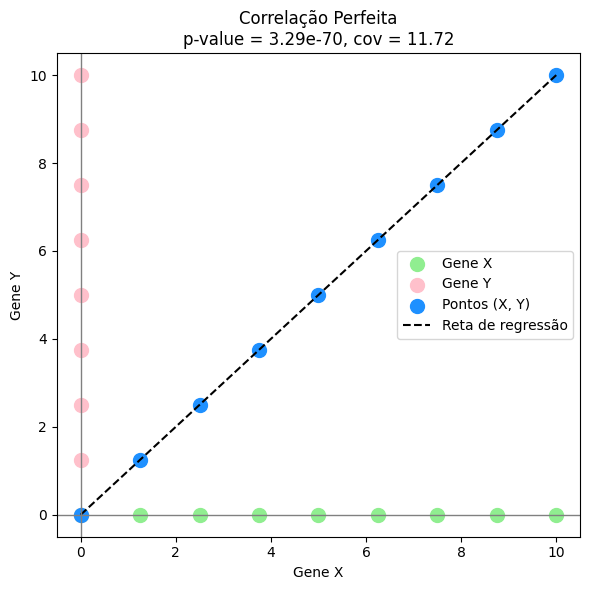

In [13]:
# Dados
x1 = np.linspace(0, 10, 9)
y1 = x1.copy()  # y = x

# Regressão linear
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, y1)

# Covariância
cov1 = np.cov(x1, y1)[0, 1]

# Plot
plt.figure(figsize=(6, 6))

# Pontos nos eixos
plt.scatter(x1, np.zeros_like(x1), color='lightgreen', s=100, label='Gene X')
plt.scatter(np.zeros_like(y1), y1, color='pink', s=100, label='Gene Y')

# Pontos principais (x, y)
plt.scatter(x1, y1, color='dodgerblue', s=100, label='Pontos (X, Y)')

# Reta de regressão
plt.plot(x1, slope1 * x1 + intercept1, linestyle='--', color='black', label='Reta de regressão')

# Estilo e legendas
plt.xlabel("Gene X")
plt.ylabel("Gene Y")
plt.title(f"Correlação Perfeita\np-value = {p_value1:.2e}, cov = {cov1:.2f}")
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.legend()
plt.tight_layout()
plt.show()

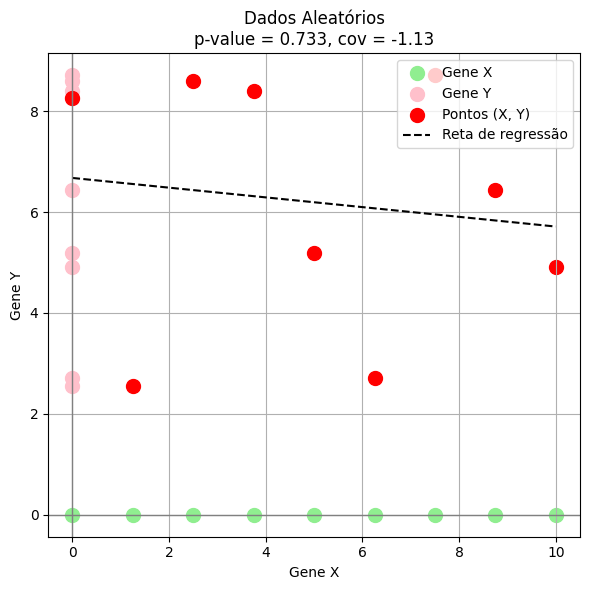

In [10]:
# Dados com distribuição uniforme
x2 = np.linspace(0, 10, 9)
y2 = np.random.uniform(0, 10, 9)

# Regressão linear
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)

# Covariância
cov2 = np.cov(x2, y2)[0, 1]

# Plot
plt.figure(figsize=(6, 6))

# Pontos nos eixos
plt.scatter(x2, np.zeros_like(x2), color='lightgreen', s=100, label='Gene X')
plt.scatter(np.zeros_like(y2), y2, color='pink', s=100, label='Gene Y')

# Pontos principais (x, y)
plt.scatter(x2, y2, color='red', s=100, label='Pontos (X, Y)')

# Reta de regressão
plt.plot(x2, slope2 * x2 + intercept2, linestyle='--', color='black', label='Reta de regressão')

# Estilo e legendas
plt.xlabel("Gene X")
plt.ylabel("Gene Y")
plt.title(f"Dados Aleatórios\np-value = {p_value2:.3f}, cov = {cov2:.2f}")
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*Interpretação dos resultados:*


Levando em consideração que buscamos analisar se existe correlação entre os genes X e Y, no primeiro plot observamos uma correlação perfeita, em que os pontos estão alinhados com a reta. O p-valor muito baixo indica que essa situação é muito improvável de ocorrer naturalmente.

Já no segundo plot, o p-valor é alto, o que indica que não há evidência estatística de correlação entre os genes. Esse comportamento é mais comum em dados reais.

Além disso, o plot 1 tem tendência positiva e o plot 2 negativa.

B: Estimando um Intervalo de Confiança para a Média

Obtenha um conjunto de dados amostrais (por exemplo, pesos de indivíduos, notas de testes, etc.).

Calcule o intervalo de confiança de 95% para a média da população seguindo os passos:
Calcular a média e o desvio padrão da amostra.
Usar a fórmula para intervalo de confiança ou a biblioteca scipy.stats.
Desafio: Repetir o processo para diferentes níveis de confiança (por exemplo, 90%, 99%) e comparar os resultados.

Visualizar os intervalos de confiança em um gráfico usando matplotlib para mostrar a variabilidade.


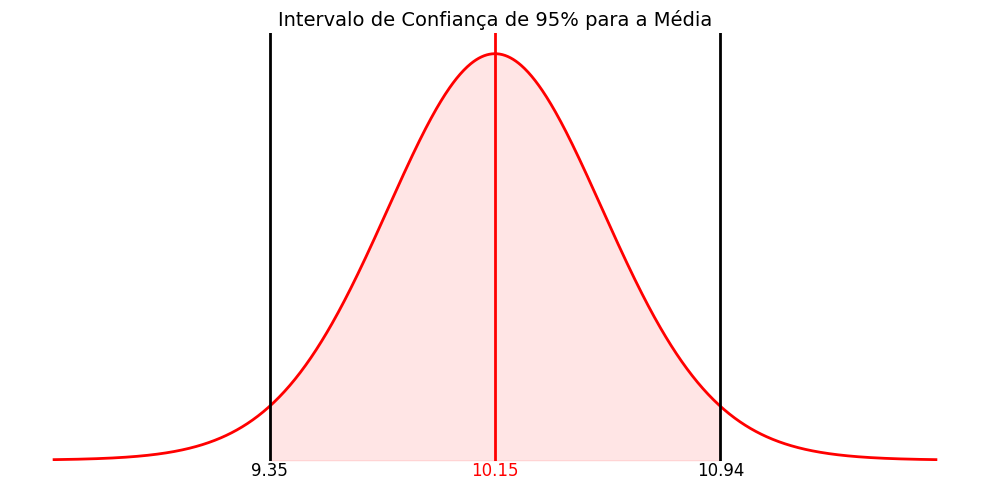

In [ ]:
# Criando a população
np.random.seed(42)
populacao = np.random.normal(loc=10, scale=2, size=10000)

# Sorteando uma amostra
amostra = np.random.choice(populacao, size=30, replace=False)

# Estatísticas da amostra
media = np.mean(amostra)
desvio = np.std(amostra, ddof=1)
erro_padrao = desvio / np.sqrt(len(amostra))
minimo = np.min(amostra)
maximo = np.max(amostra)

# Intervalo de confiança de 95%
t_critico = t.ppf(0.975, df=29)  # 1 - 0.05/2 = 0.975
margem_erro = t_critico * erro_padrao
ic_inf = media - margem_erro
ic_sup = media + margem_erro

# Curva t de Student centrada na média com escala = erro padrão
x = np.linspace(media - 4*erro_padrao, media + 4*erro_padrao, 1000)
y = t.pdf((x - media) / erro_padrao, df=graus_liberdade) / erro_padrao

# Plotagem
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='red', lw=2)

# Intervalo de confiança 95% preenchido
plt.fill_between(x, y, where=(x >= ic_inf) & (x <= ic_sup), color='red', alpha=0.1)

# Linhas verticais para os limites e média
plt.axvline(ic_inf, color='black', linewidth=2)
plt.axvline(media, color='red', linewidth=2)
plt.axvline(ic_sup, color='black', linewidth=2)

# Texto dos valores numéricos
plt.text(ic_inf, -0.002, f"{ic_inf:.2f}", ha='center', va='top', color='black', fontsize=12)
plt.text(media, -0.002, f"{media:.2f}", ha='center', va='top', color='red', fontsize=12)
plt.text(ic_sup, -0.002, f"{ic_sup:.2f}", ha='center', va='top', color='black', fontsize=12)

# Ajustes visuais
plt.ylim(bottom=-0.003)
plt.axis('off')
plt.title('Intervalo de Confiança de 95% para a Média', fontsize=14, color='black')
plt.tight_layout()
plt.show()

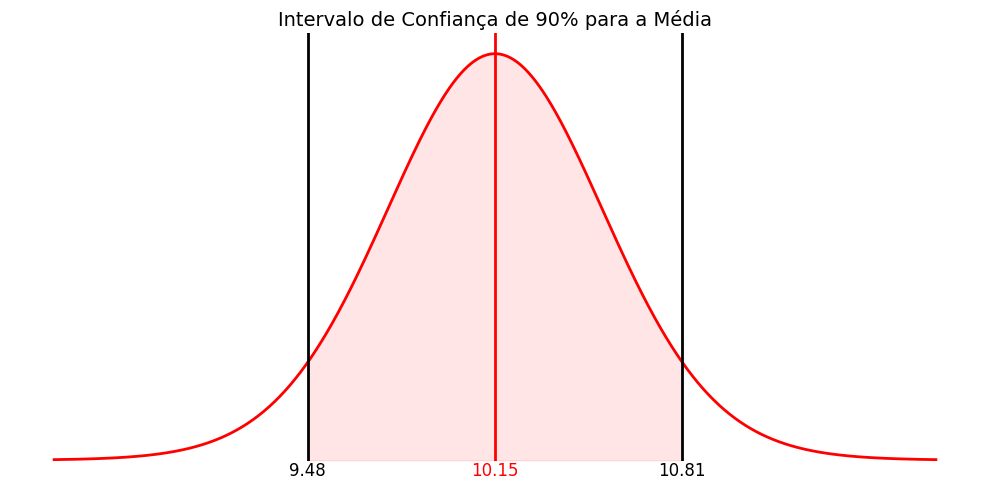

In [ ]:
# Intervalo de confiança de 90%
graus_liberdade = len(amostra) - 1
t_critico = t.ppf(0.95, graus_liberdade)  #1 - 0.10/2 = 0.95
margem_erro = t_critico * erro_padrao
ic_inf = media - margem_erro
ic_sup = media + margem_erro

# Curva t de Student centrada na média com escala = erro padrão
x = np.linspace(media - 4*erro_padrao, media + 4*erro_padrao, 1000)
y = t.pdf((x - media) / erro_padrao, df=graus_liberdade) / erro_padrao

# Plotagem
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='red', lw=2)

# Intervalo de confiança 90% preenchido
plt.fill_between(x, y, where=(x >= ic_inf) & (x <= ic_sup), color='red', alpha=0.1)

# Linhas verticais para os limites e média
plt.axvline(ic_inf, color='black', linewidth=2)
plt.axvline(media, color='red', linewidth=2)
plt.axvline(ic_sup, color='black', linewidth=2)

# Texto dos valores numéricos
plt.text(ic_inf, -0.002, f"{ic_inf:.2f}", ha='center', va='top', color='black', fontsize=12)
plt.text(media, -0.002, f"{media:.2f}", ha='center', va='top', color='red', fontsize=12)
plt.text(ic_sup, -0.002, f"{ic_sup:.2f}", ha='center', va='top', color='black', fontsize=12)

# Ajustes visuais
plt.ylim(bottom=-0.003)
plt.axis('off')
plt.title('Intervalo de Confiança de 90% para a Média', fontsize=14, color='black')
plt.tight_layout()
plt.show()

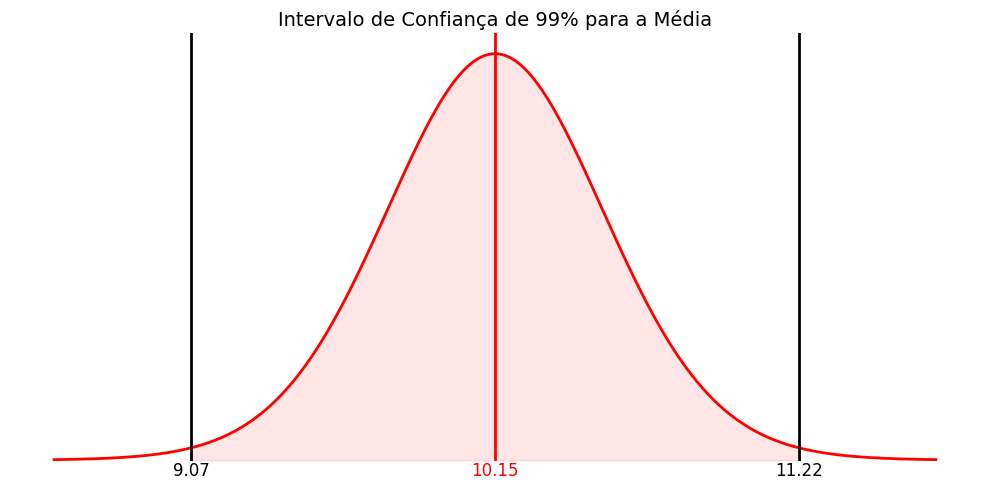

In [ ]:
# Intervalo de confiança de 99%
graus_liberdade = len(amostra) - 1
t_critico = t.ppf(0.995, graus_liberdade)  # IC 99%
margem_erro = t_critico * erro_padrao
ic_inf = media - margem_erro
ic_sup = media + margem_erro

# Curva t de Student centrada na média com escala = erro padrão
x = np.linspace(media - 4*erro_padrao, media + 4*erro_padrao, 1000)
y = t.pdf((x - media) / erro_padrao, df=graus_liberdade) / erro_padrao

# Plotagem
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='red', lw=2)

# Intervalo de confiança 99% preenchido
plt.fill_between(x, y, where=(x >= ic_inf) & (x <= ic_sup), color='red', alpha=0.1)

# Linhas verticais para os limites e média
plt.axvline(ic_inf, color='black', linewidth=2)
plt.axvline(media, color='red', linewidth=2)
plt.axvline(ic_sup, color='black', linewidth=2)

# Texto dos valores numéricos
plt.text(ic_inf, -0.002, f"{ic_inf:.2f}", ha='center', va='top', color='black', fontsize=12)
plt.text(media, -0.002, f"{media:.2f}", ha='center', va='top', color='red', fontsize=12)
plt.text(ic_sup, -0.002, f"{ic_sup:.2f}", ha='center', va='top', color='black', fontsize=12)

# Ajustes visuais
plt.ylim(bottom=-0.003)
plt.axis('off')
plt.title('Intervalo de Confiança de 99% para a Média', fontsize=14, color='black')
plt.tight_layout()
plt.show()


A diferença usando parametros porcentagens diferentes de confiança é notada somente no intervalo de confiança, podendo ser maior ou menos, nesse sentindo:

- 90% de confiança: aceitamos 10% de chance de erro (5% para cada lado da curva), ou seja, intervalo de confiança menor;

- 95% de confiança: aceitamos 5% de chance de erro (2,5% para cada lado da curva), ou seja, intervalo de confiança mediano;

- 99% de confiança: aceitamos 1% de chance de erro (0,05% para cada lado da curva), ou seja, intervalo de confiança grande

C: p-value em um Teste de Hipótese

Forneça dois conjuntos de dados: um para um grupo de controle e outro para um grupo de teste.
Formule a hipótese nula.
Realizar um teste t de duas amostras usando scipy.stats.ttest_ind.

Interpretar o p-value resultante e decidir se rejeitam a hipótese nula em um nível de significância dado (por exemplo, 0,05).



---



Hipótese nula:
As médias dos dois grupos são iguais.

Hipótese alternativa:
As médias são diferentes.

In [ ]:
# Semente para reprodutibilidade
np.random.seed(42)

# Grupo de controle: média ~50
grupo_controle = np.random.normal(loc=50, scale=5, size=30)

# Grupo de teste: média ~53 (um pouco maior)
grupo_teste = np.random.normal(loc=53, scale=5, size=30)

In [ ]:
# Teste t de duas amostras independentes
t_stat, p_value = ttest_ind(grupo_controle, grupo_teste)

print(f"Estatística t: {t_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

Estatística t: -2.8211
p-valor: 0.0065


In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Rejeitamos a hipótese nula: há diferença significativa entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula: não há evidência suficiente de diferença.")

Rejeitamos a hipótese nula: há diferença significativa entre os grupos.


D: significance_level

Faça slides explicando o código abaixo e interpretando os resultados

https://colab.research.google.com/drive/13V7IT7XbnNVf4VVehObHO6NZUxaqdl_f?usp=sharing

Teste com dois valores para significance_level Pelo menos quatro slides com a explicação e interpretação.

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_level = 0.05


significant_results = 0


for _ in range(num_simulations):

    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)


    t_stat, p_value = ttest_ind(group1, group2)


    if p_value < significance_level:
        significant_results += 1


proportion_significant = significant_results / num_simulations


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")


Number of simulations: 10000
Significance level (alpha): 0.05
Proportion of significant results (Type I error rate): 0.0507


In [ ]:
import numpy as np
from scipy.stats import ttest_ind


num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_level = 0.10


significant_results = 0


for _ in range(num_simulations):

    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)


    t_stat, p_value = ttest_ind(group1, group2)


    if p_value < significance_level:
        significant_results += 1


proportion_significant = significant_results / num_simulations


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")


Number of simulations: 10000
Significance level (alpha): 0.1
Proportion of significant results (Type I error rate): 0.1033


A explicação está no slide: https://docs.google.com/presentation/d/1bimkTDaU3C3g6maREgdwGeyVbjNDG-2Go0vBlTsTNeI/edit?usp=sharing

E: reproduzindo slides em código

Reproduza em Python o conteúdo dos slides de 24 a 46.

Population mean

In [ ]:
# Criando uma populacao
np.random.seed(42)
populacao = np.random.normal(loc=10, scale=2, size=10000)  # média=10, desvio=2

# Sorteando uma amostra aleatória
amostra = np.random.choice(populacao, size=50, replace=False)

# média e desvio padrão da amostra
media_amostra = np.mean(amostra)
desvio_amostra = np.std(amostra, ddof=1)  # ddoaf=1 = desvio padrão amostral

# erro padrão da média
erro_padrao = desvio_amostra / np.sqrt(len(amostra))

In [ ]:
# função para calcular o intervalo de confiança

confidence = 0.975
degrees_of_freedom = 49 #numero de amostras -1

t_critical = t.ppf(confidence,degrees_of_freedom)
print(t_critical)

margem_erro = t_critical * erro_padrao
limite_inferior = media_amostra - margem_erro
limite_superior = media_amostra + margem_erro

print(margem_erro)
print(f"Média da amostra: {media_amostra:.2f} cm")
print(f"Intervalo de confiança de 95%: [{limite_inferior:.2f}, {limite_superior:.2f}] cm")

2.0095752371292397
0.6003475569515596
Média da amostra: 10.12 cm
Intervalo de confiança de 95%: [9.52, 10.72] cm


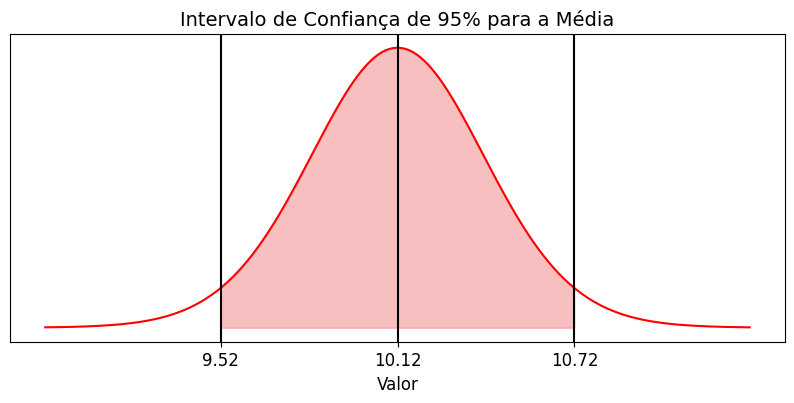

In [ ]:
# Eixo x baseado no erro padrão
x = np.linspace(media_amostra - 4*erro_padrao, media_amostra + 4*erro_padrao, 1000)
y = t.pdf((x - media_amostra) / erro_padrao, df=graus_liberdade) / erro_padrao

plt.figure(figsize=(10, 4))
plt.plot(x, y, color='red')

# Preenchimento do intervalo de confiança
plt.fill_between(x, y, where=(x >= limite_inferior) & (x <= limite_superior),
                 color='lightcoral', alpha=0.5)

# Linhas verticais
plt.axvline(limite_inferior, color='black')
plt.axvline(media_amostra, color='black')
plt.axvline(limite_superior, color='black')


# Texto abaixo indicando os valores
plt.xticks([limite_inferior, media_amostra, limite_superior],
           [f"{limite_inferior:.2f}", f"{media_amostra:.2f}", f"{limite_superior:.2f}"],
           fontsize=12)

# Remover eixo y e deixar limpo
plt.yticks([])
plt.title("Intervalo de Confiança de 95% para a Média", fontsize=14)
plt.xlabel("Valor", fontsize=12)

plt.show()

Population proportion

In [ ]:
# Parâmetros da simulação
np.random.seed(42)
tamanho_populacao = 100000
proporcao_real = 0.6  # 60% de "sucesso"

# Criando a população com 1s e 0s
populacao = np.random.choice([1, 0], size=tamanho_populacao, p=[proporcao_real, 1 - proporcao_real])

# Amostragem
n = 200
amostra = np.random.choice(populacao, size=n, replace=False)
p_hat = np.mean(amostra)

In [ ]:
# Intervalo de confiança para proporção
z_critico = norm.ppf(0.975)  # 95% → z = 1.96
erro_padrao = np.sqrt((p_hat * (1 - p_hat)) / n)
margem_erro = z_critico * erro_padrao
ic_inf = p_hat - margem_erro
ic_sup = p_hat + margem_erro

print(f"Proporção amostral (p̂): {p_hat:.3f}")
print(f"Margem de erro: {margem_erro:.3f}")
print(f"Intervalo de Confiança 95%: [{ic_inf:.3f}, {ic_sup:.3f}]")

Proporção amostral (p̂): 0.650
Margem de erro: 0.066
Intervalo de Confiança 95%: [0.584, 0.716]


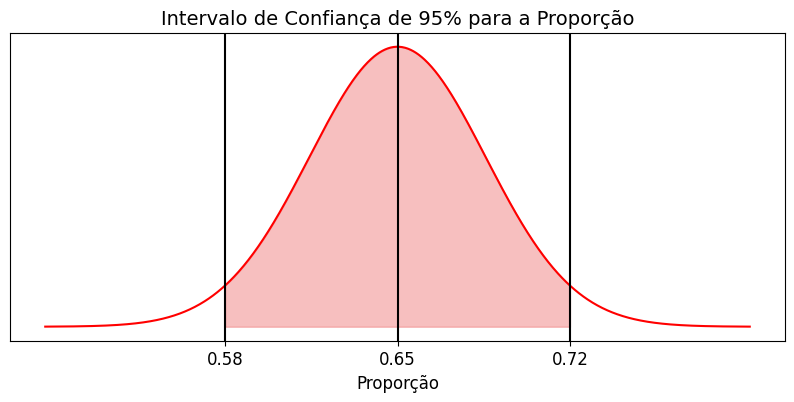

In [ ]:
# Curva normal para a proporção
x = np.linspace(p_hat - 4*erro_padrao, p_hat + 4*erro_padrao, 1000)
y = norm.pdf(x, loc=p_hat, scale=erro_padrao)

# Plotagem no estilo "educativo"
plt.figure(figsize=(10, 4))
plt.plot(x, y, color='red')

# Preenchimento do intervalo de confiança
plt.fill_between(x, y, where=(x >= ic_inf) & (x <= ic_sup),
                 color='lightcoral', alpha=0.5)

# Linhas verticais
plt.axvline(ic_inf, color='black')
plt.axvline(p_hat, color='black')
plt.axvline(ic_sup, color='black')

# Texto abaixo indicando os valores
plt.xticks([ic_inf, p_hat, ic_sup],
           [f"{ic_inf:.2f}", f"{p_hat:.2f}", f"{ic_sup:.2f}"],
           fontsize=12)

# Remover eixo y e deixar limpo
plt.yticks([])
plt.title("Intervalo de Confiança de 95% para a Proporção", fontsize=14)
plt.xlabel("Proporção", fontsize=12)

plt.show()